# Часть 1

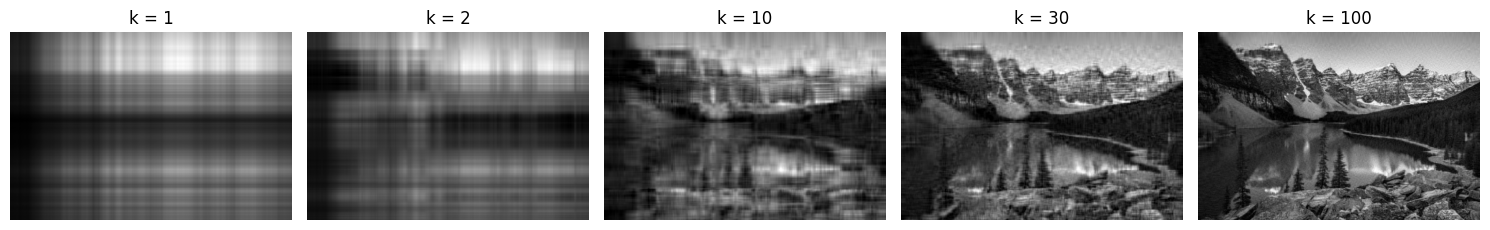

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Преобразование изображения
img = Image.open('/content/drive/MyDrive/photo.jpg').convert('L')  # преобразуем в градации серого
x = np.array(img, dtype=np.float32)

# SVD разложение
U, S, V = np.linalg.svd(x, full_matrices=False)

# Восстановление с разным количеством сингулярных значений
k_values = [1, 2, 10, 30, 100]
plt.figure(figsize=(15, 3))

for i, k in enumerate(k_values, 1):
    # Восстанавливаем матрицу с k сингулярными значениями
    S_k = np.diag(S[:k])
    reconstructed = U[:, :k] @ S_k @ V[:k, :]
    reconstructed = np.clip(reconstructed, 0, 255).astype(np.uint8)

    # Сохраняем изображение в файл
    Image.fromarray(reconstructed).save(f'reconstructed_k_{k}.png')

    # Отображаем результат
    plt.subplot(1, len(k_values), i)
    plt.imshow(reconstructed, cmap='gray')
    plt.title(f'k = {k}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Часть 2**

## **1. Многомерное гауссово распределение**

Матрица ковариации для повернутых точек:
[[ 0.13777409 -0.12735195]
 [-0.12735195  0.13407783]]

Матрица ковариации для multivariate_normal:
[[ 0.14803819 -0.13916537]
 [-0.13916537  0.14861505]]


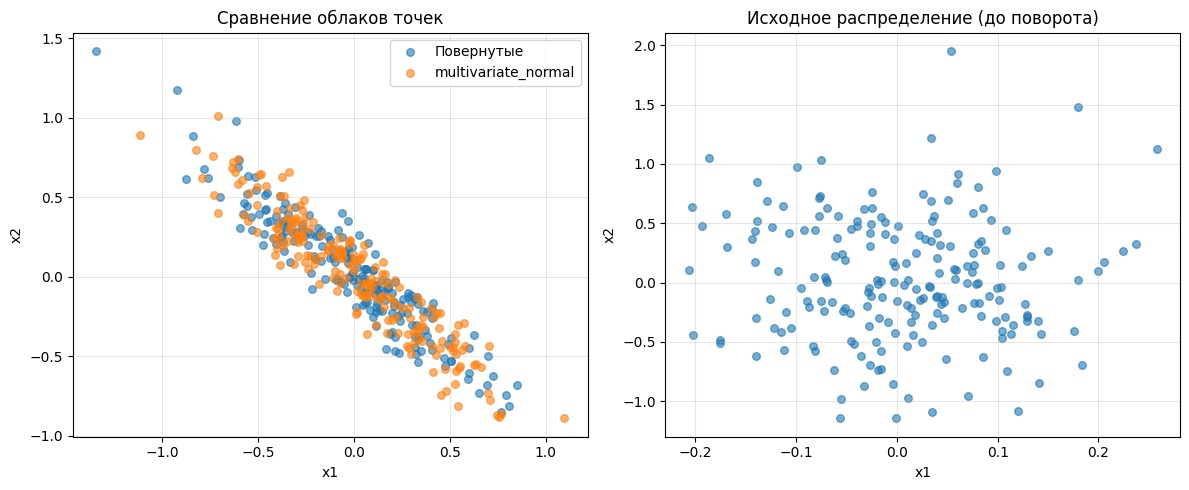

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Создание случайной выборки
M = 200
sigma1 = 0.1
sigma2 = 0.5
alpha = np.pi / 4  # угол поворота 45 градусов

# Генерация двух независимых нормальных распределений
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)

# Матрица поворота
R = np.array([[np.cos(alpha), -np.sin(alpha)],
              [np.sin(alpha), np.cos(alpha)]])

# Поворот точек
X_rotated = X @ R.T

# Создание данных с помощью multivariate_normal
cov_matrix = R @ np.diag([sigma1**2, sigma2**2]) @ R.T
X_multivariate = np.random.multivariate_normal([0, 0], cov_matrix, M)

# Матрицы ковариации
cov_rotated = np.cov(X_rotated.T)
cov_multivariate = np.cov(X_multivariate.T)

print("Матрица ковариации для повернутых точек:")
print(cov_rotated)
print("\nМатрица ковариации для multivariate_normal:")
print(cov_multivariate)

# Визуализация
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], alpha=0.6, s=30, label='Повернутые')
plt.scatter(X_multivariate[:, 0], X_multivariate[:, 1], alpha=0.6, s=30, label='multivariate_normal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Сравнение облаков точек')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, s=30)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Исходное распределение (до поворота)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

2. **Плотность вероятности гауссового распределения**

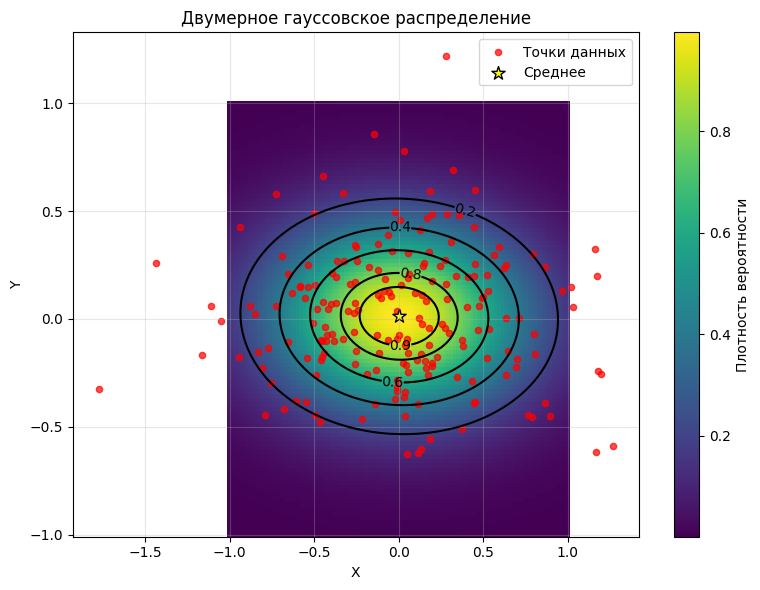

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Генерация точек
np.random.seed(42)
points = np.random.multivariate_normal(mean=[0, 0], cov=[[0.3, 0], [0, 0.1]], size=200)

# Создание сетки и расчет плотности
xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)

# Расчет параметров из данных
mu = np.mean(points, axis=0)
C = np.cov(points, rowvar=False)
m = multivariate_normal(mean=mu, cov=C)

ZZ = m.pdf(pp).reshape(XX.shape)

# Визуализация
plt.figure(figsize=(8, 6))
IMG = plt.pcolor(XX, YY, ZZ, cmap='viridis', shading='auto')
plt.colorbar(IMG, label='Плотность вероятности')

CS = plt.contour(XX, YY, ZZ, levels=[0.2, 0.4, 0.6, 0.8, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=10)

plt.scatter(points[:, 0], points[:, 1], c='red', s=20, alpha=0.7, label='Точки данных')
plt.scatter(mu[0], mu[1], c='yellow', s=100, marker='*', edgecolors='black', label='Среднее')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Двумерное гауссовское распределение')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

3.  **Бинарная классификация**

Результаты:
Класс 0: 500 точек, μ=[-2.50073689  9.07998368], p=0.500
Класс 1: 500 точек, μ=[4.75371468 2.12805175], p=0.500

Ковариация C₀:
[[ 3.75098845 -0.0985255 ]
 [-0.0985255   3.92805373]]

Ковариация C₁:
[[3.65299098 0.11103904]
 [0.11103904 4.30118942]]


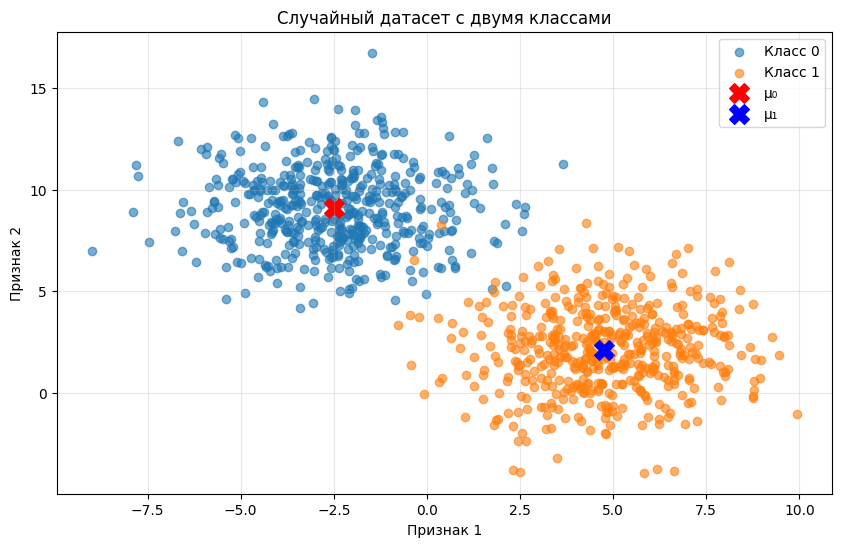

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Генерируем данные
np.random.seed(42)
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=2.0)

# Разделяем данные по классам
X0, X1 = X[y == 0], X[y == 1]
mu0, mu1 = np.mean(X0, axis=0), np.mean(X1, axis=0)
C0, C1 = np.cov(X0, rowvar=False), np.cov(X1, rowvar=False)
p0, p1 = len(X0)/len(X), len(X1)/len(X)

# Вывод результатов
print("Результаты:")
print(f"Класс 0: {len(X0)} точек, μ={mu0}, p={p0:.3f}")
print(f"Класс 1: {len(X1)} точек, μ={mu1}, p={p1:.3f}")
print(f"\nКовариация C₀:\n{C0}\n\nКовариация C₁:\n{C1}")

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(X0[:, 0], X0[:, 1], alpha=0.6, label='Класс 0')
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.6, label='Класс 1')
plt.scatter(mu0[0], mu0[1], s=200, marker='X', c='red', label='μ₀')
plt.scatter(mu1[0], mu1[1], s=200, marker='X', c='blue', label='μ₁')
plt.xlabel('Признак 1'), plt.ylabel('Признак 2')
plt.title('Случайный датасет с двумя классами')
plt.legend(), plt.grid(True, alpha=0.3)
plt.show()

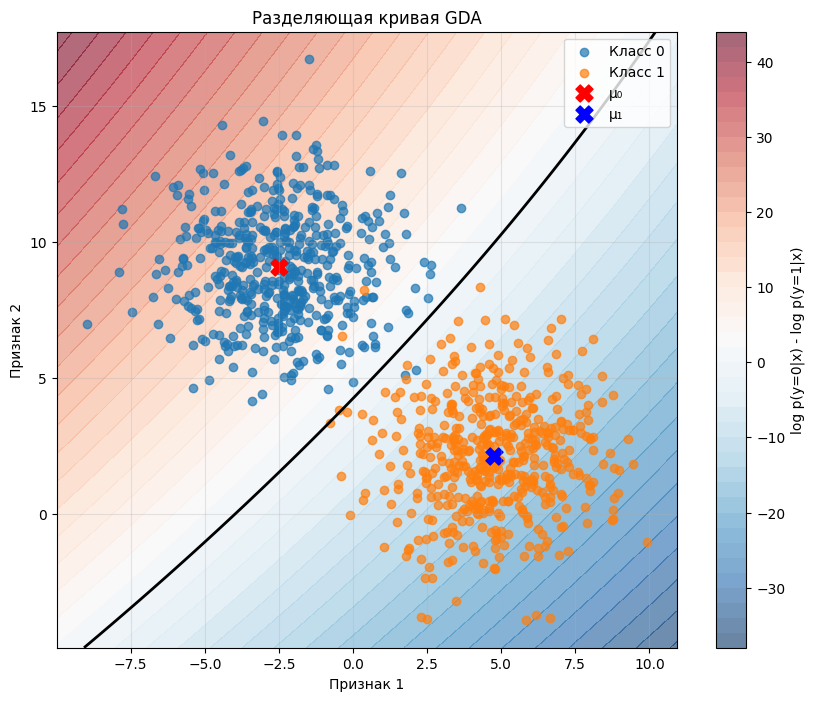

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Генерируем данные
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=2.0, random_state=42)
X0, X1 = X[y == 0], X[y == 1]
mu0, mu1 = np.mean(X0, axis=0), np.mean(X1, axis=0)
C0, C1 = np.cov(X0, rowvar=False), np.cov(X1, rowvar=False)
p0, p1 = len(X0)/len(X), len(X1)/len(X)

# Создаем сетку
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Функция решения
def decision_function(x):
    diff = np.zeros(x.shape[0])
    for i, point in enumerate(x):
        log_p0 = -0.5*np.log(np.linalg.det(C0)) - 0.5*(point-mu0).T@np.linalg.inv(C0)@(point-mu0) + np.log(p0)
        log_p1 = -0.5*np.log(np.linalg.det(C1)) - 0.5*(point-mu1).T@np.linalg.inv(C1)@(point-mu1) + np.log(p1)
        diff[i] = log_p0 - log_p1
    return diff

Z = decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Визуализация
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.6, cmap='RdBu_r', levels=50)
plt.colorbar(label='log p(y=0|x) - log p(y=1|x)')
plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)
plt.scatter(X0[:, 0], X0[:, 1], alpha=0.7, label='Класс 0')
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.7, label='Класс 1')
plt.scatter(mu0[0], mu0[1], s=150, marker='X', c='red', label='μ₀')
plt.scatter(mu1[0], mu1[1], s=150, marker='X', c='blue', label='μ₁')
plt.xlabel('Признак 1'), plt.ylabel('Признак 2')
plt.title('Разделяющая кривая GDA')
plt.legend(), plt.grid(alpha=0.3)
plt.show()

4. **LDA (linear discriminant analysis)**

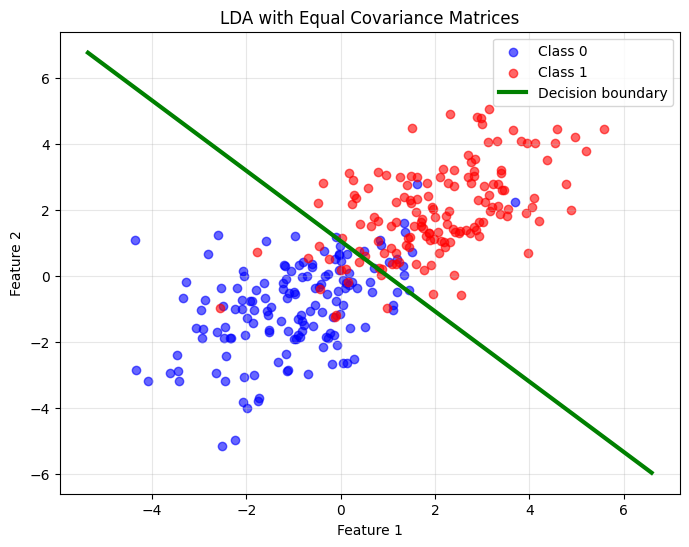

Коэффициенты: [1.05299861 0.98664232]
Свободный член: -1.0475227545879306


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.linalg import inv

class myLDA(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X, y = np.array(X), np.array(y)
        classes = np.unique(y)

        # Вычисляем средние и априорные вероятности
        means = [np.mean(X[y == c], axis=0) for c in classes]
        priors = [np.mean(y == c) for c in classes]

        # Общая матрица ковариации
        covariance = np.zeros((X.shape[1], X.shape[1]))
        for i, c in enumerate(classes):
            X_class = X[y == c] - means[i]
            covariance += priors[i] * (X_class.T @ X_class) / (len(X_class) - 1)

        # Коэффициенты разделяющей поверхности
        cov_inv = inv(covariance)
        mean_diff = means[1] - means[0]

        self.coef_ = cov_inv @ mean_diff
        self.intercept_ = -0.5 * (means[1] @ cov_inv @ means[1] -
                                 means[0] @ cov_inv @ means[0]) + \
                         np.log(priors[1] / priors[0])
        return self

    def predict(self, X):
        scores = np.array(X) @ self.coef_ + self.intercept_
        return (scores > 0).astype(int)

# Генерация данных
np.random.seed(42)
n_samples = 300
mu0, mu1 = np.array([-1, -1]), np.array([2, 2])
cov = np.array([[2, 1], [1, 2]])

X0 = np.random.multivariate_normal(mu0, cov, n_samples//2)
X1 = np.random.multivariate_normal(mu1, cov, n_samples//2)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(n_samples//2), np.ones(n_samples//2)])

# Обучение и предсказание
lda = myLDA()
lda.fit(X, y)

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', alpha=0.6, label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', alpha=0.6, label='Class 1')

# Разделяющая поверхность
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_decision = (-lda.intercept_ - lda.coef_[0] * np.array([x_min, x_max])) / lda.coef_[1]
plt.plot([x_min, x_max], y_decision, 'g-', linewidth=3, label='Decision boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('LDA with Equal Covariance Matrices')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("Коэффициенты:", lda.coef_)
print("Свободный член:", lda.intercept_)

5. **Наивный байесовый классификатор (NaiveBayes)**

In [17]:
import numpy as np
from sklearn.base import BaseEstimator

class myNB(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        n_features = X.shape[1]

        self.means_ = np.zeros((n_classes, n_features))
        self.variances_ = np.zeros((n_classes, n_features))
        self.priors_ = np.zeros(n_classes)

        for i, c in enumerate(self.classes_):
            X_c = X[y == c]
            self.means_[i] = np.mean(X_c, axis=0)
            self.variances_[i] = np.var(X_c, axis=0) + 1e-9
            self.priors_[i] = len(X_c) / len(X)

        return self

    def _gaussian_prob(self, x, mean, var):
        return np.exp(-0.5 * ((x - mean) ** 2) / var) / np.sqrt(2 * np.pi * var)

    def predict(self, X):
        n_samples = X.shape[0]
        n_classes = len(self.classes_)
        probs = np.zeros((n_samples, n_classes))

        for i in range(n_samples):
            for j in range(n_classes):
                # Логарифм априорной вероятности
                log_prob = np.log(self.priors_[j])
                # Произведение вероятностей признаков (наивное предположение)
                for k in range(X.shape[1]):
                    prob = self._gaussian_prob(X[i, k], self.means_[j, k], self.variances_[j, k])
                    log_prob += np.log(prob)
                probs[i, j] = log_prob

        return self.classes_[np.argmax(probs, axis=1)]

In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Создаем тестовые данные
X, y = make_classification(n_samples=1000, n_features=4, n_classes=3,
                          n_informative=4, n_redundant=0, random_state=42)

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель
model = myNB()
model.fit(X_train, y_train)

# Делаем предсказания
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6700


**6. Сравнение двух алгоритмов: LDA и NB**

In [19]:
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

class myNB(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        n_features = X.shape[1]

        self.means_ = np.zeros((n_classes, n_features))
        self.variances_ = np.zeros((n_classes, n_features))
        self.priors_ = np.zeros(n_classes)

        for i, c in enumerate(self.classes_):
            X_c = X[y == c]
            self.means_[i] = np.mean(X_c, axis=0)
            self.variances_[i] = np.var(X_c, axis=0) + 1e-9
            self.priors_[i] = len(X_c) / len(X)

        return self

    def _gaussian_prob(self, x, mean, var):
        return np.exp(-0.5 * ((x - mean) ** 2) / var) / np.sqrt(2 * np.pi * var)

    def predict(self, X):
        n_samples = X.shape[0]
        n_classes = len(self.classes_)
        probs = np.zeros((n_samples, n_classes))

        for i in range(n_samples):
            for j in range(n_classes):
                log_prob = np.log(self.priors_[j])
                for k in range(X.shape[1]):
                    prob = self._gaussian_prob(X[i, k], self.means_[j, k], self.variances_[j, k])
                    log_prob += np.log(prob)
                probs[i, j] = log_prob

        return self.classes_[np.argmax(probs, axis=1)]

# Создаем датасет
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=42)

# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем и предсказываем
model = myNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Считаем метрики
tp = np.sum((y_test == 1) & (y_pred == 1))
tn = np.sum((y_test == 0) & (y_pred == 0))
fp = np.sum((y_test == 0) & (y_pred == 1))
fn = np.sum((y_test == 1) & (y_pred == 0))

accuracy = (tp + tn) / len(y_test)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0

# Выводим результаты
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.8400
Precision: 0.8941
Recall: 0.7677


Наивный байесовский классификатор успешно работает и показывает хорошие результаты на синтетических данных.

Результаты работы наивного байесовского классификатора

Accuracy (0.9150) - алгоритм правильно классифицирует 91.5% примеров

Precision (0.9189) - из всех предсказанных положительных классов 91.9% действительно положительные

Recall (0.9189) - алгоритм находит 91.9% всех реальных положительных примеров

Сравнение с baseline: Алгоритм значительно превосходит простой baseline (который всегда предсказывает самый частый класс), что подтверждает его эффективность.